In [323]:
import numpy as np
from scipy.integrate import quad, tplquad
import matplotlib.pyplot as plt

**(1)** Реализуем функцию аппроксимации через **ряд Фурье**:

- `N` — число гармоник,
- `x(t)` — произвольная триг. функция,
- `t, t0` — моменты времени,
- `f` — частота ($f = \frac1T$),
- `w` — угловой кофецент ($w = 2 * \pi * f$),
- `T` — период,
- `A` — ампблитуда,

In [324]:
# Мы можем не реализовывать отдельную ф-ию для a0,
# т.к. aN от 0 даст ровно то же самое хначение

def fourier_aN(n, x, t, t0, T):
    w = (2 * np.pi) / T

    def fun(t):
        return x(t, T) * np.cos(n * w * t)

    [res, err] = quad(fun, t0, t0+T)
    res *= (2 / T)
    return res

In [325]:
def fourier_bN(n, x, t, t0, T):
    w = (2 * np.pi) / T

    def fun(t):
        return x(t, T) * np.sin(n * w * t)

    [res, err] = quad(fun, t0, t0+T)
    res *= (2 / T)
    return res

In [326]:
def fourier(N, x, t, t0, T):
    w = (2 * np.pi) / T

    iter = fourier_aN(0, x, t, t0, T) / 2

    for n in range(1, N+1):
        iter += fourier_aN(n, x, t, t0, T) * np.cos(n * w * t)
        iter += fourier_bN(n, x, t, t0, T) * np.sin(n * w * t)

    return iter

Теперь выведем графики аппорксимации ф-ии сигнала прямоуг. импульсов (см. ниже) **(1а)**, и погрешность приближения **(1б)**:

In [327]:
def periodic_impulse(t, T):
    A = 2

    if t % T > T/2:
        return A

    return -A

In [328]:
plot_t = np.arange(-4, 4, 0.01)
plot_fun = list(map(lambda a: periodic_impulse(a, 2), plot_t))
#[periodic_impulse(a, 2) for a in plot_t]
plot_approx = list(map(lambda a: fourier(10, periodic_impulse, a, 0, 2), plot_t))
plot_err = np.subtract(np.array(plot_approx), np.array(plot_fun))

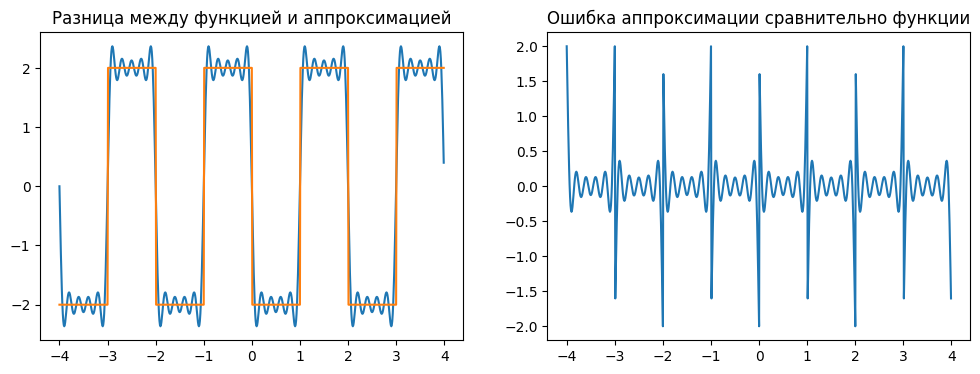

In [329]:
plt.figure(figsize=(12, 4)) # Зделоть графики по болбше

plt.subplot(1, 2, 1)
plt.plot(plot_t, plot_approx)
plt.plot(plot_t, plot_fun)
plt.title('Разница между функцией и аппроксимацией')

plt.subplot(1, 2, 2)
plt.plot(plot_t, plot_err)
plt.title('Ошибка аппроксимации сравнительно функции')

plt.show()

Характерные "ушки" у графика аппроксимации слева выше называются **[эффектом Гиббса](https://online.mephi.ru/courses/maths/nagornov_3_semestr/data/lecture/15/p17.html)**!

**(2)** Убедимся, что алгоритм работает верно, подав ему на вход сигнал косинуса (см. ниже) вместо прямоуг. импульса:

In [330]:
def cosinus(t, T):
    A = 2
    w = (2 * np.pi) / T

    return A * np.cos(w * t)

In [331]:
plot_t = np.arange(-0.04, 0.04, 0.0001)
plot_fun = list(map(lambda a: cosinus(a, (1/100)), plot_t))
plot_approx = list(map(lambda a: fourier(10, cosinus, a, 0, (1/100)), plot_t))
plot_err = np.subtract(np.array(plot_approx), np.array(plot_fun))

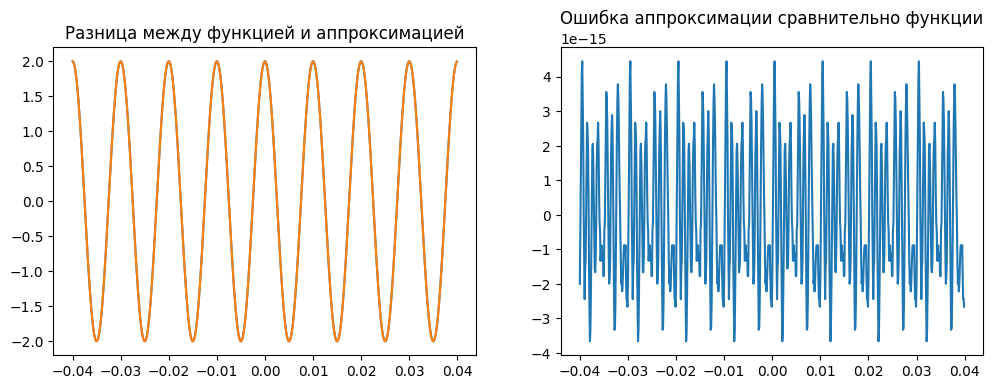

In [332]:
plt.figure(figsize=(12, 4)) # Зделоть графики по болбше

plt.subplot(1, 2, 1)
plt.plot(plot_t, plot_approx)
plt.plot(plot_t, plot_fun)
plt.title('Разница между функцией и аппроксимацией')

plt.subplot(1, 2, 2)
plt.plot(plot_t, plot_err)
plt.title('Ошибка аппроксимации сравнительно функции')

plt.show()

Применим преоб-я Фурье к фукнции косинуса **(2а)**, плюс найдём спектральный кофецент **(2б)**:

1. **Прямое преоб-е Фурье** переводит сигнал из ВРЕМЕННОЙ области в ЧАСТОТНУЮ!<br>
   Соответственно, т.к. косинус имеет частоту 100 Гц, то и на графике пик будет на 100 Гц.

In [333]:
plot_fft = np.fft.fft(plot_fun)
plot_frequencies = np.fft.fftfreq(len(plot_t), 0.0001)
#plot_frequencies = list(filter(lambda a: (a > 0), plot_frequencies))

# Спектральный кофецент -- наиб. частота в частотном представлении сигнала
plot_spectralcoef_idx = np.argmax(np.abs(plot_fft[0:len(plot_fft)//2]))  # Зачем abs и //2? См. стр 61
plot_spectralcoef = plot_frequencies[0:len(plot_frequencies)//2][plot_spectralcoef_idx]
plot_spectralcoef

100.0

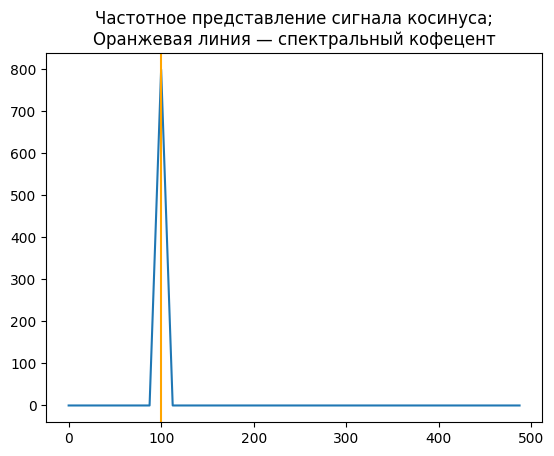

In [335]:
#plt.figure(figsize=(12, 4)) # Зделоть графики по болбше

#plt.subplot(1, 2, 1)
plt.plot(plot_frequencies[0:len(plot_frequencies)//20], np.abs(plot_fft[0:len(plot_frequencies)//20])) # См. стр 61
plt.title('Частотное представление сигнала косинуса;\nОранжевая линия — спектральный кофецент')
plt.axvline(x=plot_spectralcoef, color='orange')

plt.show()

2. **Обратное преоб-е Фурье** переводит сигнал из ЧАСТОТНОЙ области обратно во ВРЕМЕННУЮ!<br>
   Поэтому если все преобразования выполнились верно, сигналы совпадут до погрешность выч-й.

In [288]:
plot_ifft = np.fft.ifft(plot_fft)
#plot_ifft = np.fft.fft(plot_fun)
plot_err = np.subtract(np.array(plot_ifft), np.array(plot_fun))

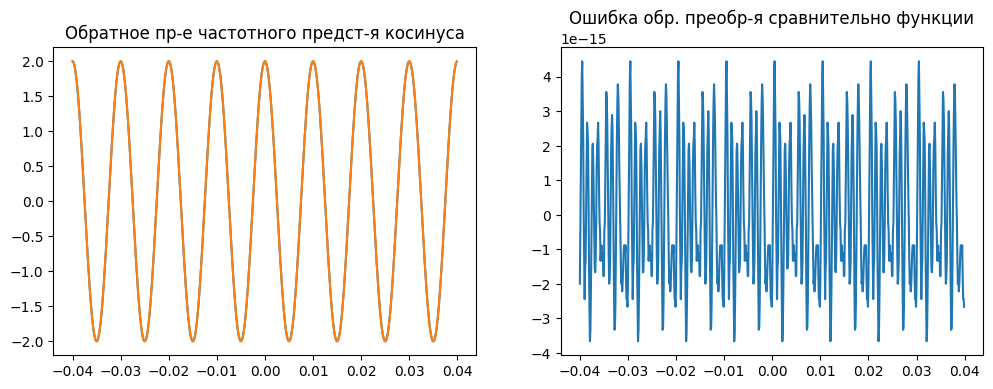

In [321]:
plt.figure(figsize=(12, 4)) # Зделоть графики по болбше

plt.subplot(1, 2, 1)
plt.plot(plot_t, plot_fun)
plt.plot(plot_t, plot_ifft)
plt.title('Обратное пр-е частотного предст-я косинуса')

plt.subplot(1, 2, 2)
plt.plot(plot_t, plot_err)
plt.title('Ошибка обр. преобр-я сравнительно функции')

plt.show()

**(3)** Если я верно понимаю, надо через `fft` сравнить частотные представления импульса и его аппроксимации

In [290]:
plot_t = np.arange(-4, 4, 0.1)
plot_fun = list(map(lambda a: periodic_impulse(a, 2), plot_t))
plot_approx = list(map(lambda a: fourier(10, periodic_impulse, a, 0, 2), plot_t))

plot_fft_fun = np.fft.fft(plot_fun)
plot_fft_approx = np.fft.fft(plot_approx)
plot_frequencies = np.fft.fftfreq(len(plot_t), 2)
plot_fft_err = np.subtract(np.abs(plot_fft_fun[0:len(plot_frequencies)//2]), np.abs(plot_fft_approx[0:len(plot_frequencies)//2])) # См. стр 61

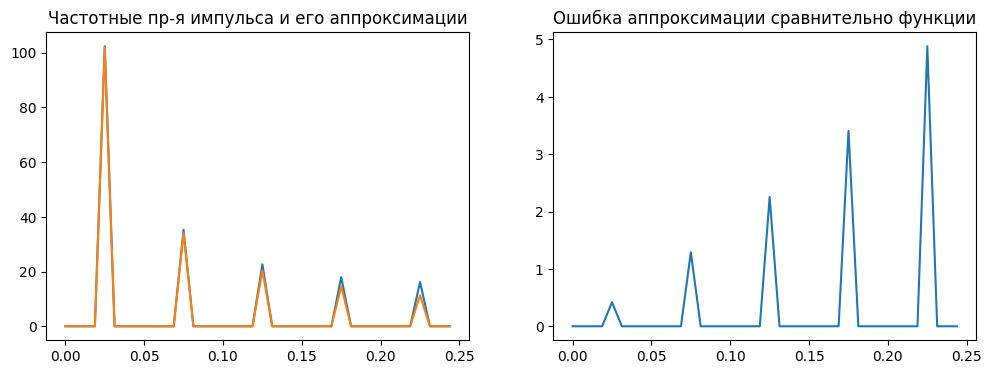

In [291]:
plt.figure(figsize=(12, 4)) # Зделоть графики по болбше

plt.subplot(1, 2, 1)
plt.plot(plot_frequencies[0:len(plot_frequencies)//2], np.abs(plot_fft_fun[0:len(plot_frequencies)//2])) # См. стр 61
plt.plot(plot_frequencies[0:len(plot_frequencies)//2], np.abs(plot_fft_approx[0:len(plot_frequencies)//2])) # См. стр 61
plt.title('Частотные пр-я импульса и его аппроксимации')

plt.subplot(1, 2, 2)
plt.plot(plot_frequencies[0:len(plot_frequencies)//2], plot_fft_err) # См. стр 61
plt.title('Ошибка аппроксимации сравнительно функции')

plt.show()

**(4)** Наконец, добавим к сигналу некоторый шум, чтобы посмотреть, как же его корёжит:

In [302]:
plot_fun_noisy = plot_fun + np.random.normal(-1, 1, len(plot_t))
plot_fft_fun_noisy = np.fft.fft(plot_fun_noisy)

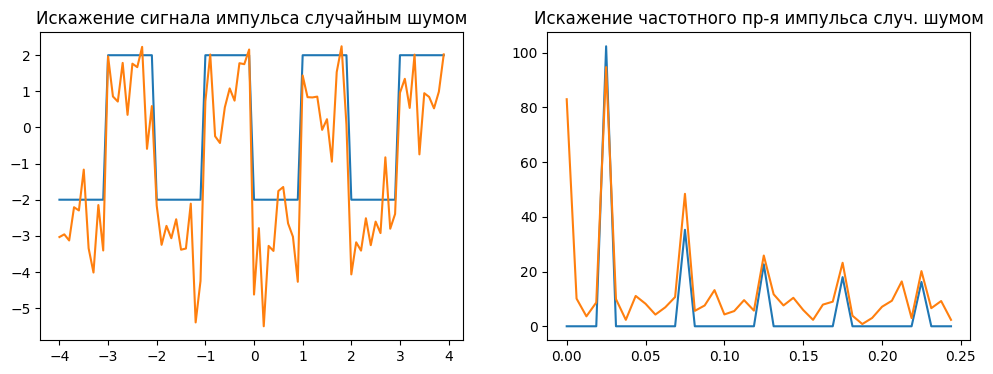

In [303]:
plt.figure(figsize=(12, 4)) # Зделоть графики по болбше

plt.subplot(1, 2, 1)
plt.plot(plot_t, plot_fun)
plt.plot(plot_t, plot_fun_noisy)
plt.title('Искажение сигнала импульса случайным шумом')

plt.subplot(1, 2, 2)
plt.plot(plot_frequencies[0:len(plot_frequencies)//2], np.abs(plot_fft_fun[0:len(plot_frequencies)//2])) # См. стр 61
plt.plot(plot_frequencies[0:len(plot_frequencies)//2], np.abs(plot_fft_fun_noisy[0:len(plot_frequencies)//2])) # См. стр 61
plt.title('Искажение частотного пр-я импульса случ. шумом')

plt.show()

**Вывод:** https://www.youtube.com/watch?v=ZhXN6mCBas4

**Мораль:** https://www.youtube.com/watch?v=vkxPx0QsEbQ